# Build a model to predict how much it would cost to buy house property

# Problem Statement:

A home Buyers doesnt just look at home from outside and say I want this house. In fact, while buying house pepole look for a lot of factors like how many bedrooms , bathrooms the house has. does it even have balcony or front lawn, whats to its east, west ,south, north  direction.

Just like that there are mnay factors affecting a buyer to buy a desired house.


The goal of this challenge is to build a machine learning model that predicts the price of house property to build.

Build a model to predict how much the price does it takes to buy a desired house.

# DataSet:
   
This data set is widely available over internet for free. You are given a rich dataset with features for each house. One row of data is for one house.

# Step 1: Import all the required libraries

- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In [2]:
#loading training data
try:
    df = pd.read_csv('house-prices.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
df.head(50)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 128 rows and 8 columns


We noticed that 'price' is our target variable whereas rest are features. Now our problem is build as a supervised learning and our target variable is in continuos data values so we have to apply regression algorithms to build a model


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


with the info function will get to know that we have zero non null values to whole dataset and we have total 3 types of data types in dataset which is, numerical, object and datetime

*Now will count the separatly every data type column list*




In [6]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)


In [7]:

print("total number of cateogrical columns are ", len(objects_lst))
print("there names are as follows: ", objects_lst)

total number of cateogrical columns are  2
there names are as follows:  ['Brick', 'Neighborhood']


In [8]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)



In [9]:
print("total number of numerical columns are ", len(int64_lst))
print("there names are as follows: ", int64_lst)

total number of numerical columns are  6
there names are as follows:  ['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']


as we have Home column in our dataset if we count the unique values of id column which shown below and also len of dataset

In [10]:
len(df['Home'].unique()), df.shape[0]

(128, 128)

- we notice that uniqueness of id column and length of the dataset both are same that means there is no sense to keep id column

# DATA PREPROCESSING

In [11]:
df = df.drop(['Home'], axis = 1)

In [12]:
# now we have the dataframe
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


In [13]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 128 rows and 7 columns


# Step 3: Descriptive Analysis

Goal/Purpose: find the data distribution of the features. Visyalization, it helps to understand data and also to explain the data to another person

**Things we are going to do in this step:**

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [14]:
df.describe(include = 'all')

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,128.000000,128.000000,128.000000,128.000000,128.000000,128,128
unique,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,No,East
freq,NaN,NaN,NaN,NaN,NaN,86,45
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125,NaN,NaN
std,26868.770371,211.572431,0.725951,0.514492,1.069324,NaN,NaN
min,69100.000000,1450.000000,2.000000,2.000000,1.000000,NaN,NaN
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000,NaN,NaN
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000,NaN,NaN
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000,NaN,NaN


# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

*The standard deviation is the average amount of variability in your dataset.*

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [15]:
df.std()

Price        26868.770371
SqFt           211.572431
Bedrooms         0.725951
Bathrooms        0.514492
Offers           1.069324
dtype: float64

# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [16]:
df.var()

Price        7.219308e+08
SqFt         4.476289e+04
Bedrooms     5.270054e-01
Bathrooms    2.647023e-01
Offers       1.143455e+00
dtype: float64

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.

# 1. Mean

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [17]:
df.mean()

Price        130427.343750
SqFt           2000.937500
Bedrooms          3.023438
Bathrooms         2.445312
Offers            2.578125
dtype: float64

# 2. Median

The median is the middle value. It is the value that splits the dataset in half.

In [18]:
df.median()

Price        125950.0
SqFt           2000.0
Bedrooms          3.0
Bathrooms         2.0
Offers            3.0
dtype: float64

# 3. Mode

The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.




In [19]:
df.mode()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,103200,1920.0,3.0,2.0,3.0,No,East
1,105600,1930.0,NaN,NaN,NaN,NaN,NaN
2,117800,2000.0,NaN,NaN,NaN,NaN,NaN
3,125700,NaN,NaN,NaN,NaN,NaN,NaN
4,129800,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.duplicated().sum()

0

# Null and Nan values

**1. NULL Values**

In [21]:
df.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

as we can see we dont have any NULL Values in dataset

**2. NAN Values**

In [22]:
df.isna().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

as we can see we dont have any NAN Values in dataset

# Count of unique occurences of every value in all categorical value

In [23]:
for value in objects_lst:
    print(value, ":", df[value].unique()) 

Brick : ['No' 'Yes']
Neighborhood : ['East' 'North' 'West']


In [24]:
#lets convert categorical values into numeric
# by using one hot encoder
brick = pd.get_dummies(df['Brick'])

In [25]:
neighborhood = pd.get_dummies(df['Neighborhood'])

In [26]:
# cross-check 
brick

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
123,0,1
124,0,1
125,1,0
126,1,0


In [27]:
neighborhood

,East,North,West
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
123,1,0,0
124,1,0,0
125,0,1,0
126,0,0,1


**Now we need to concatenate these numeric values in dataset**


In [28]:
#after converting we need to concatenate new cols (numerical) into dataset
final_df = pd.concat([df, brick, neighborhood])

final_df = final_df.drop(['Brick', 'Neighborhood'], axis = 1)

**Now after that we dont need categorical cols we will remove them from our dataframe**

In [29]:
#calling new dataframe
final_df

,Price,SqFt,Bedrooms,Bathrooms,Offers,No,Yes,East,North,West
0,114300.0,1790.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1,114200.0,2030.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
2,114800.0,1740.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
3,94700.0,1980.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
4,119800.0,2130.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [30]:
print ('The new dataset has {0} rows and {1} columns'.format(final_df.shape[0],final_df.shape[1]))

The new dataset has 384 rows and 10 columns


**As u can see we have many nan values visible in dataset, lets fill up them by using**

In [31]:
final_df = final_df.fillna(value = 0)

In [32]:
final_df

,Price,SqFt,Bedrooms,Bathrooms,Offers,No,Yes,East,North,West
0,114300.0,1790.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,114200.0,2030.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
2,114800.0,1740.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,94700.0,1980.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
4,119800.0,2130.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# NOW, WE HAVE OUR DESIRED DATASET
we need to move on to next step

# SKWENESS

In [33]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [34]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [35]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Price,0.4729,positive (+ve) skewed
1,SqFt,0.0785,positive (+ve) skewed
2,Bedrooms,0.2152,positive (+ve) skewed
3,Bathrooms,0.3986,positive (+ve) skewed
4,Offers,0.2839,positive (+ve) skewed


In [36]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,5,0,0


We notice with the above results that we have following details:
1. 5 columns are positive skewed

# Step 4: Data Exploration

Goal/Purpose:-
Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

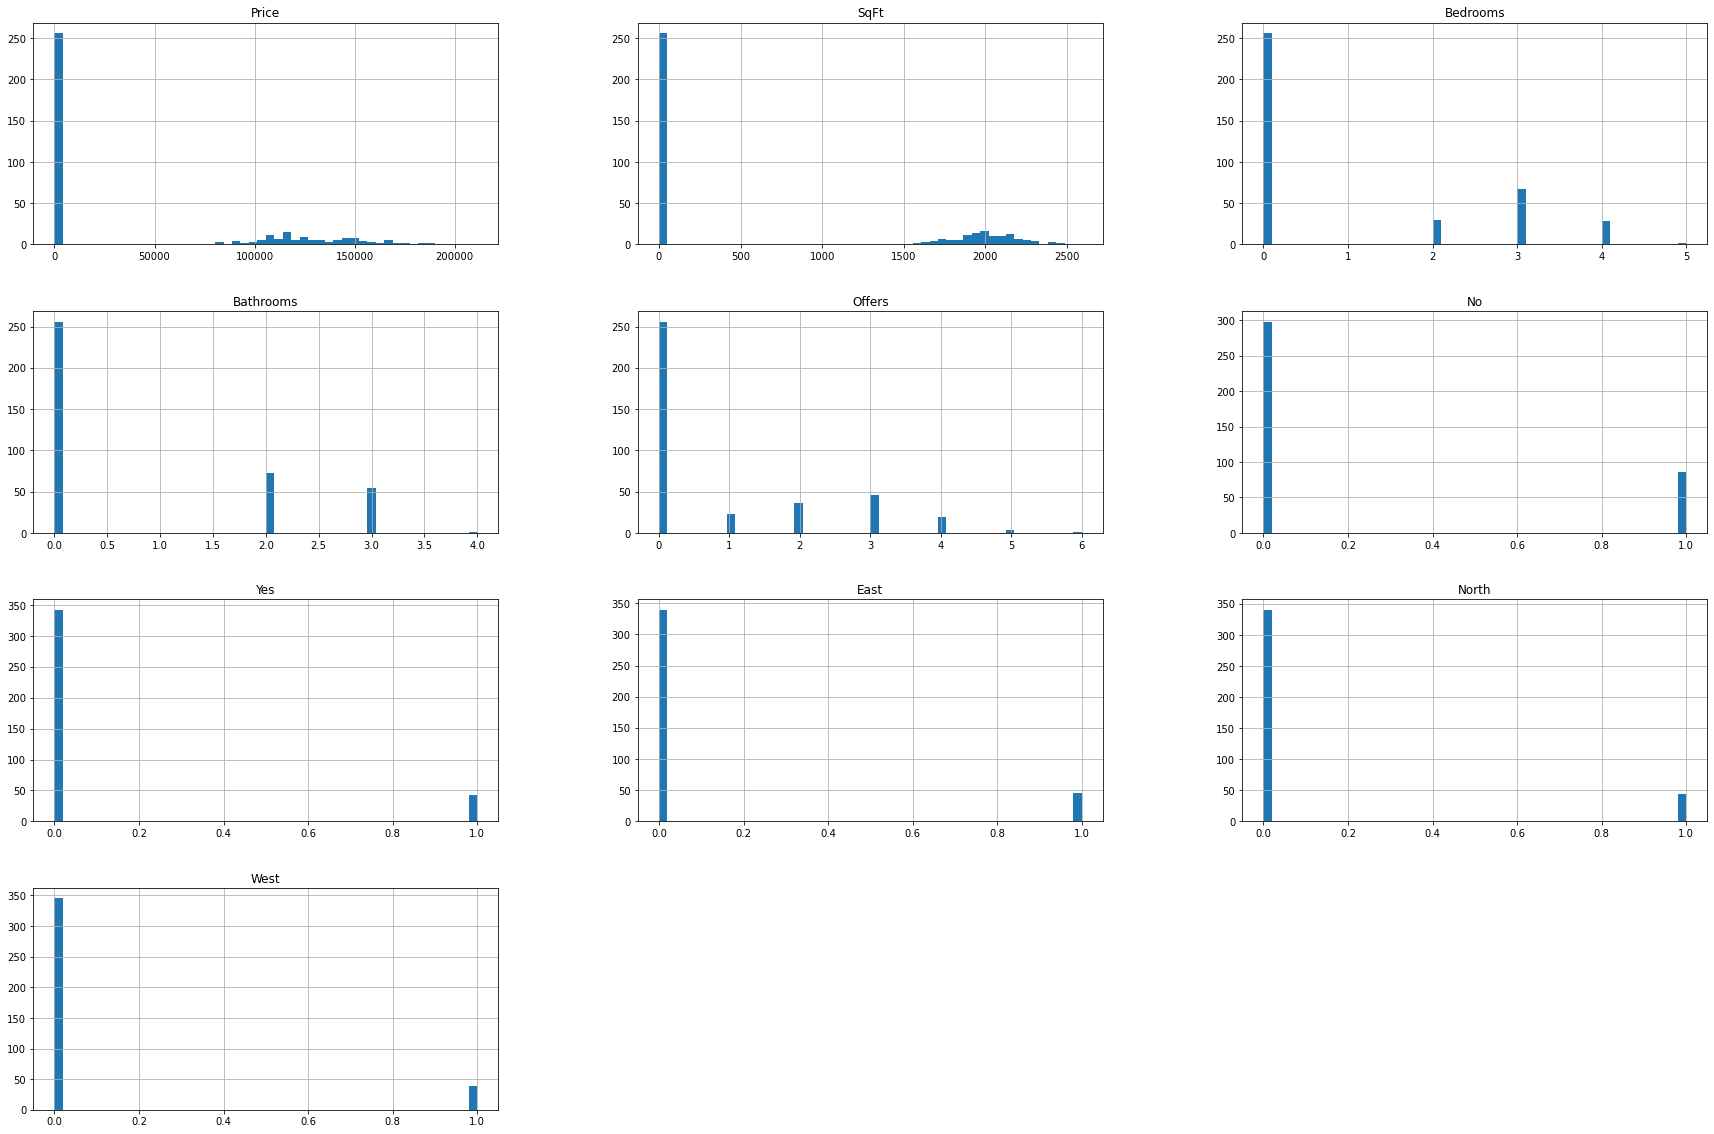

In [37]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
final_df.hist(bins=50, figsize=(30,20))
plt.show()

# 2. Distplot

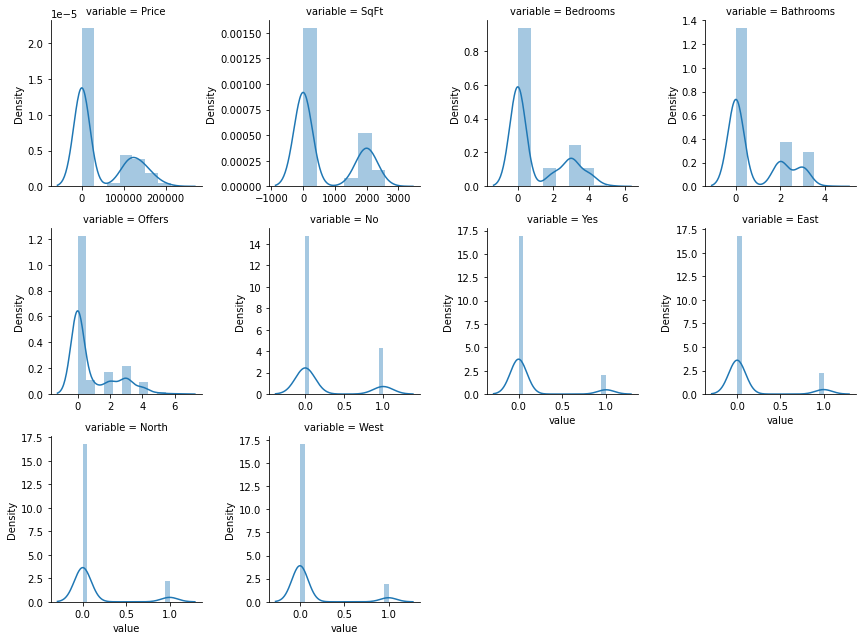

In [38]:
num = [f for f in final_df.columns if final_df.dtypes[f] != 'object']
nd = pd.melt(final_df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

above we draw distrution bar graphs to confirm about statiscts of the data that we got our data have skewness so here also we notice with the above results that we have following details:
1. 5 columns are positive skewed

# 3. Heatmap


**Correlation within feature variables**

*Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.*

**Correlation can have a value:**

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation

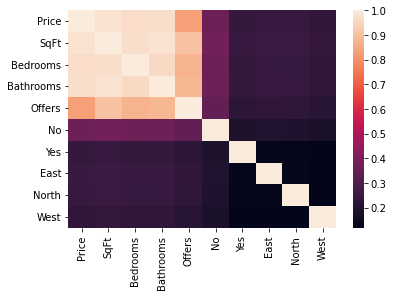

In [39]:
#correlation plot
corr = final_df.corr().abs()
sns.heatmap(corr)
plt.show()

In [40]:
corr

,Price,SqFt,Bedrooms,Bathrooms,Offers,No,Yes,East,North,West
Price,1.000000,0.979115,0.966768,0.971098,0.830853,0.368406,0.240324,0.249857,0.246702,0.230573
SqFt,0.979115,1.000000,0.969189,0.977269,0.904405,0.376741,0.245761,0.255510,0.252283,0.235789
Bedrooms,0.966768,0.969189,1.000000,0.958517,0.870799,0.364545,0.237805,0.247238,0.244116,0.228156
Bathrooms,0.971098,0.977269,0.958517,1.000000,0.880401,0.367935,0.240017,0.249538,0.246387,0.230278
Offers,0.830853,0.904405,0.870799,0.880401,1.000000,0.338942,0.221104,0.229875,0.226972,0.212133
No,0.368406,0.376741,0.364545,0.367935,0.338942,1.000000,0.188258,0.195726,0.193254,0.180619
Yes,0.240324,0.245761,0.237805,0.240017,0.221104,0.188258,1.000000,0.127679,0.126066,0.117824
East,0.249857,0.255510,0.247238,0.249538,0.229875,0.195726,0.127679,1.000000,0.131067,0.122498
North,0.246702,0.252283,0.244116,0.246387,0.226972,0.193254,0.126066,0.131067,1.000000,0.120951
West,0.230573,0.235789,0.228156,0.230278,0.212133,0.180619,0.117824,0.122498,0.120951,1.000000


as we know, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors.


In [41]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [46]:
to_drop

[]

As it's not giving any cols to drop, we will move on to next step

# 4. Scatter plot (of target with various features)

In [42]:
cols = ['SqFt','Bedrooms', 'Bathrooms', 'Offers', 'No', 'Yes', 'East', 'North','West']

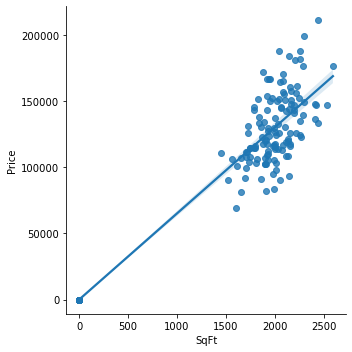

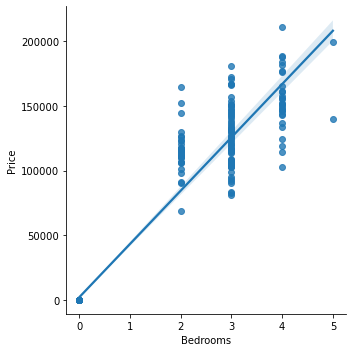

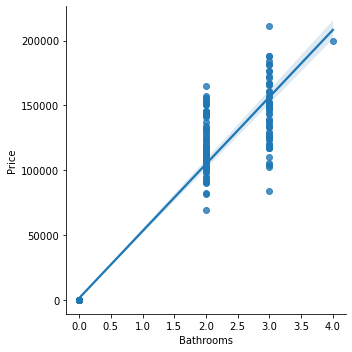

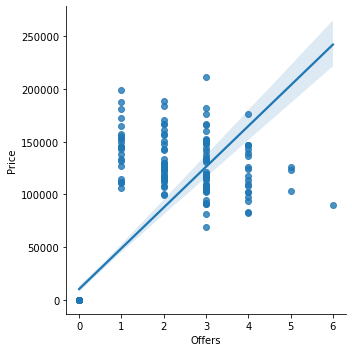

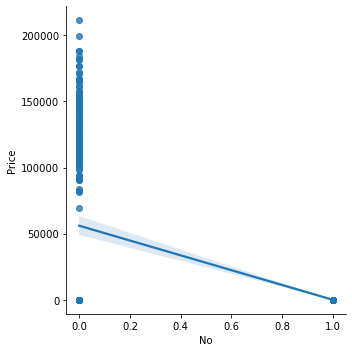

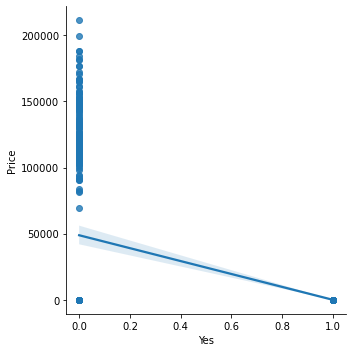

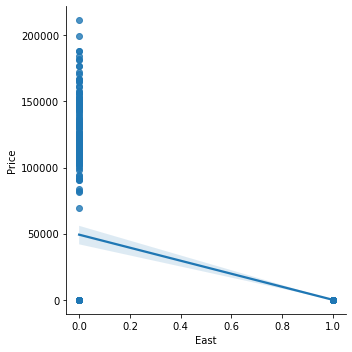

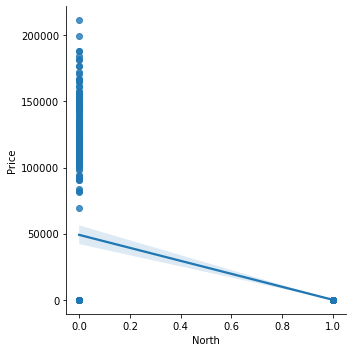

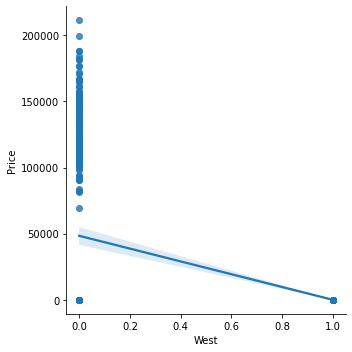

In [43]:
for value in cols:
    sns.lmplot(x=value, y="Price", data=final_df);

plt.show()


# 5. Boxplot

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.

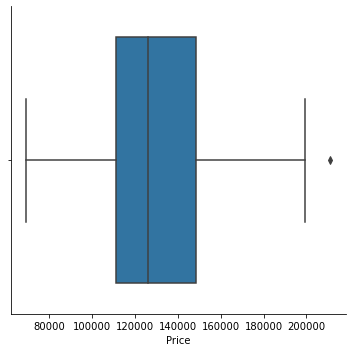

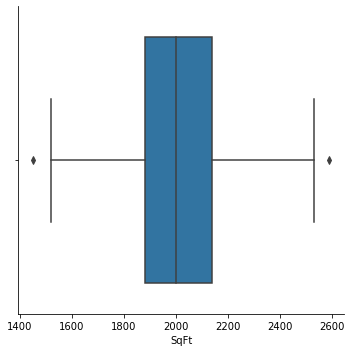

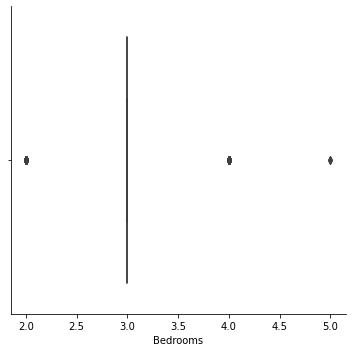

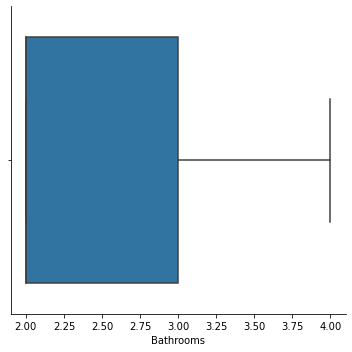

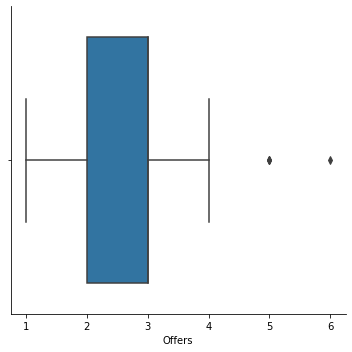

In [44]:
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

As u can see there are outliers in the int64_lst_cols 
but they are no that major so we let it slide

# Step 5: Saving the preprocess dataframe to csv for model training purpose

In [45]:
final_df.to_csv('house_df2.csv')